In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
para = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\coin.jpg',0)

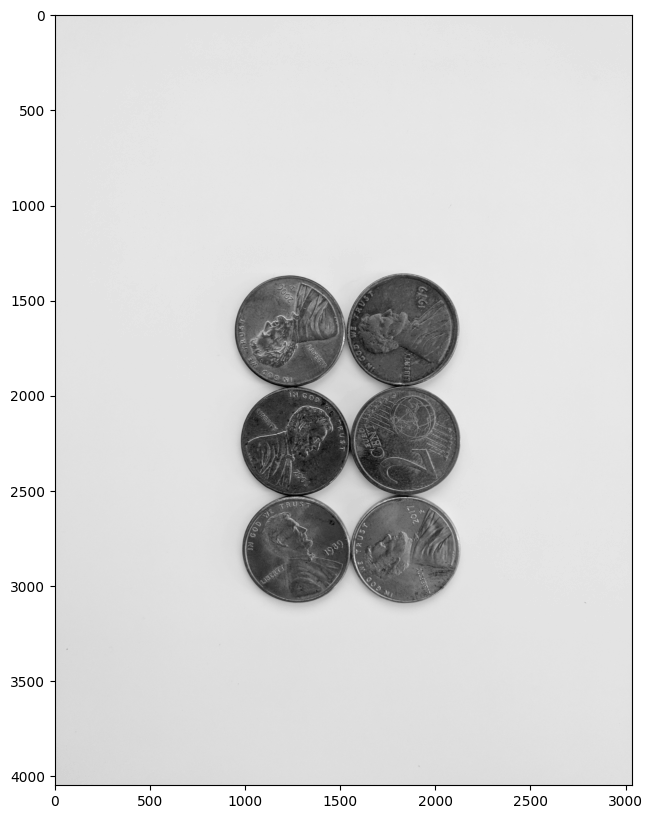

In [5]:
display(para)

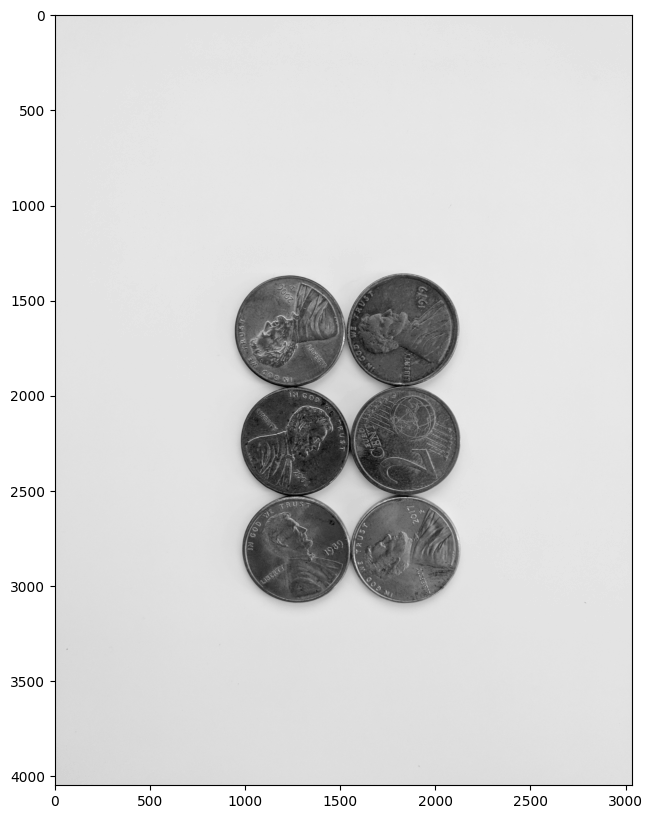

In [7]:
gri_para = cv2.cvtColor(para,cv2.COLOR_BGR2GRAY)
display(gri_para)

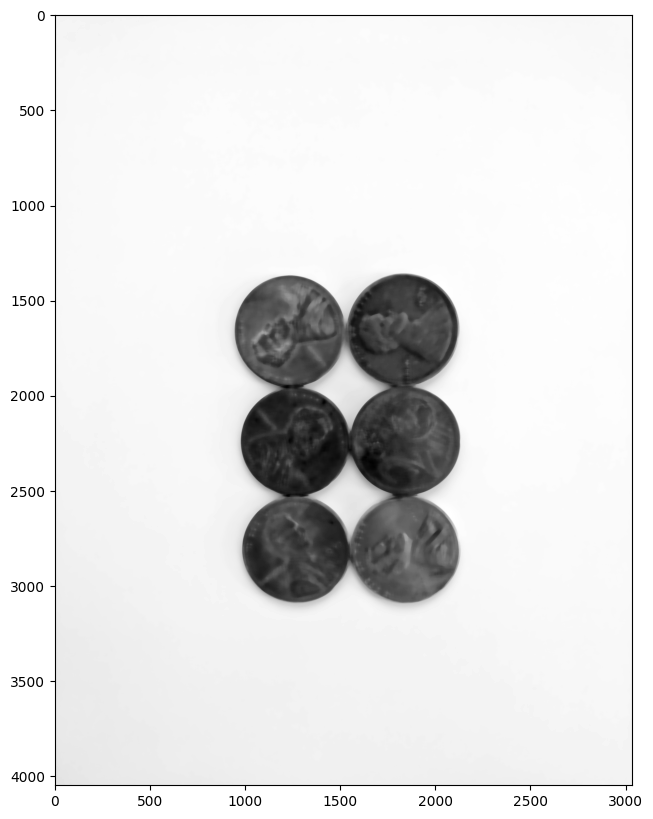

In [10]:
blurred_para = cv2.medianBlur(gri_para,25)
display(blurred_para)

In [11]:
ret , thresh = cv2.threshold(blurred_para,160,255,cv2.THRESH_BINARY_INV)

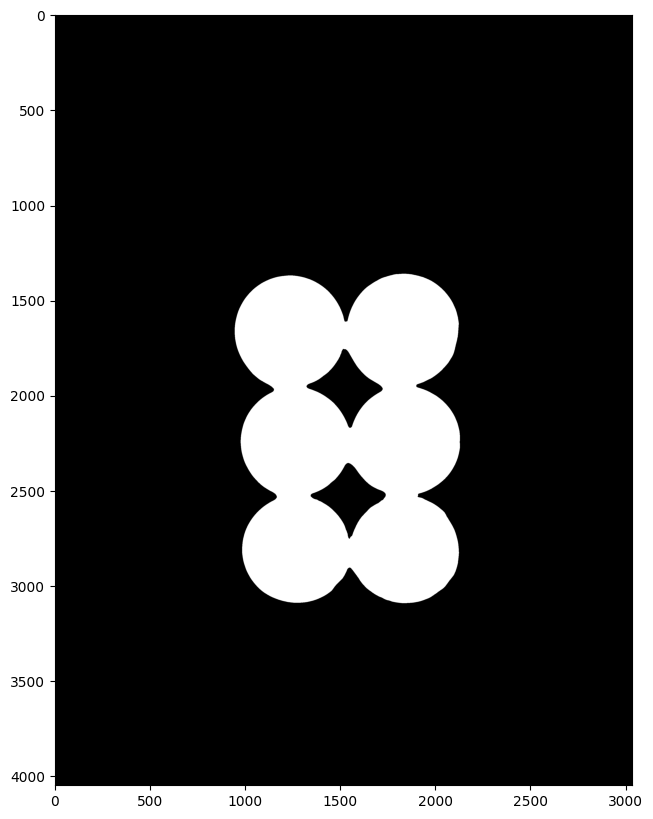

In [12]:
display(thresh)

In [16]:
cnts , hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
type(hierarchy)

numpy.ndarray

In [18]:
for i in range(len(cnts)): # şekillere çemcer çizmek için  
    if hierarchy[0][i][3] == -1: # -1 means outermost contour 
        cv2.drawContours(para,cnts,i,255,10)
   

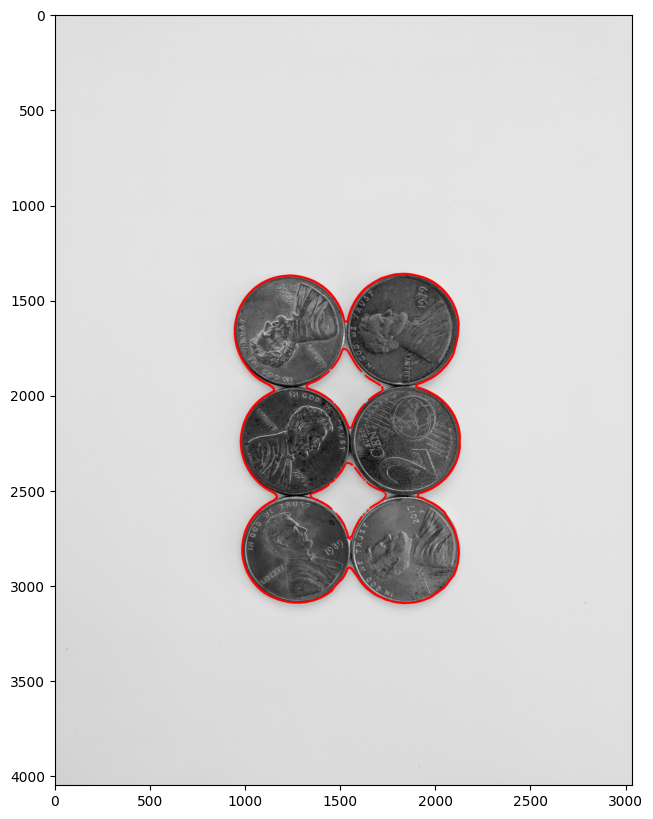

In [19]:
display(para)

### Watershed algoritması

In [20]:
img = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\coin.jpg')

In [21]:
blurlu_img = cv2.medianBlur(img,35)

In [22]:
gri_blurlu_img = cv2.cvtColor(blurlu_img,cv2.COLOR_BGR2GRAY)

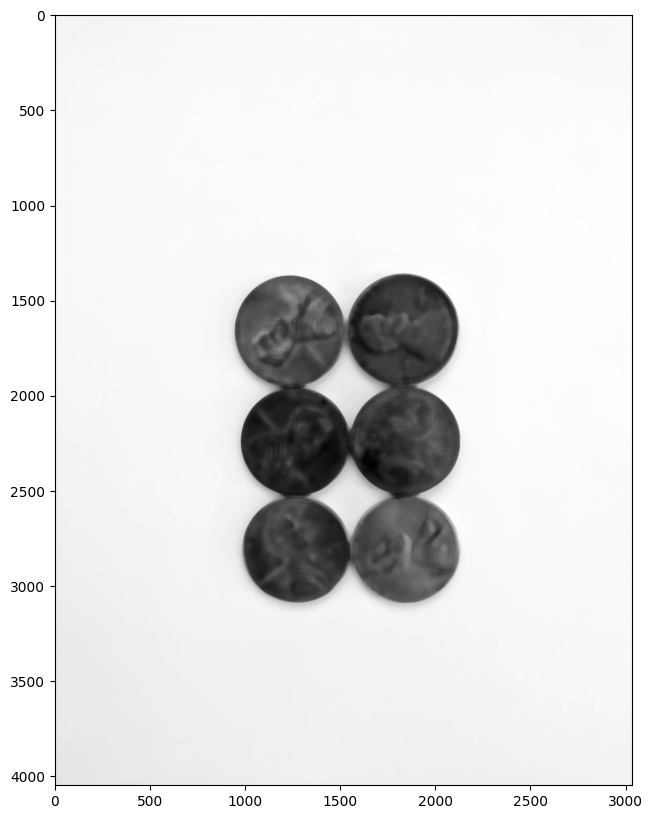

In [23]:
display(gri_blurlu_img)

In [24]:
ret, thresh = cv2.threshold(gri_blurlu_img,160,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

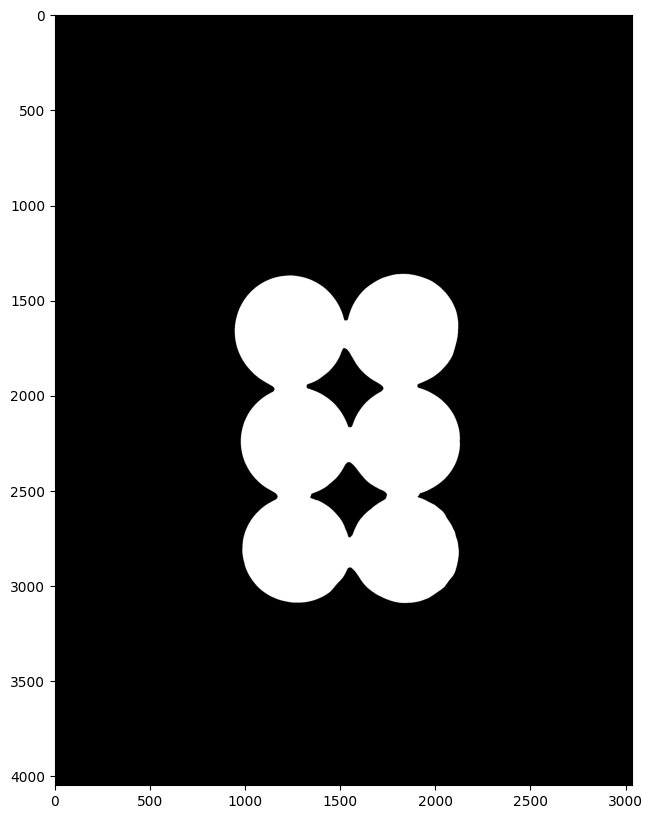

In [25]:
display(thresh)


In [26]:
kernel = np.ones((3,3),np.uint8) # 3x3 lük bir matris oluşturduk çünkü 3x3 lük bir matrisle erozyon ve genişleme yapacağız
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2) # opening işlemi için 2 iterasyon yaptık gürültü azalttık

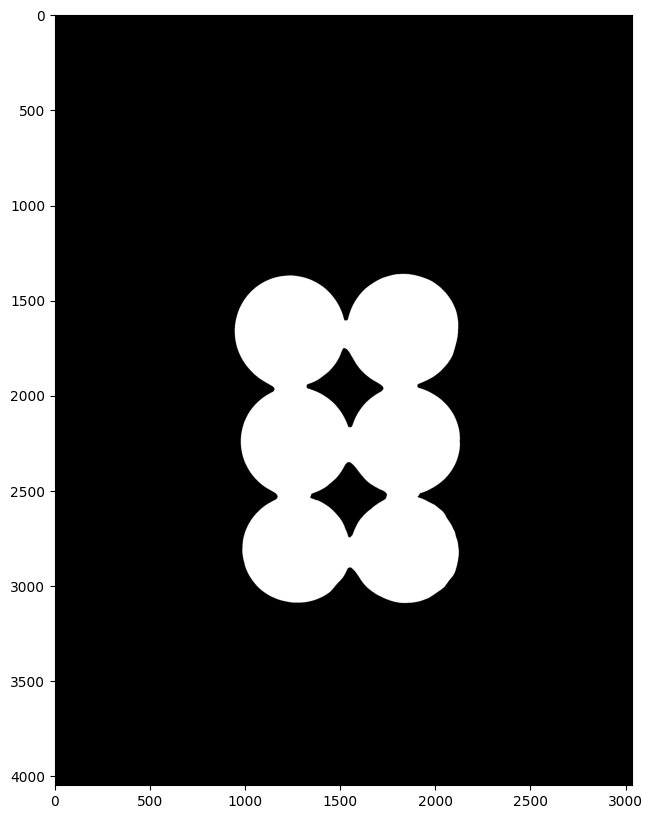

In [27]:
display(opening)

In [28]:
sure_background = cv2.dilate(opening,kernel,iterations=3) # arka planı genişlettik

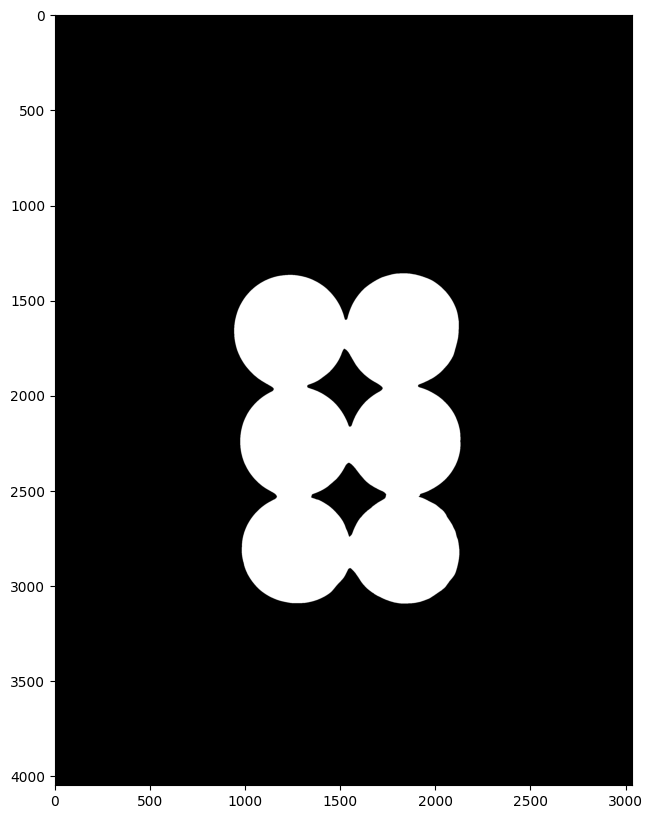

In [29]:
display(sure_background)

In [30]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # opening işlemi yaptığımız resim üzerinde distance transform işlemi yaptık bu işlem sayesinde resimdeki nesnelerin birbirinden uzaklıklarını bulduk 5 ise maskenin boyutu

ret, sure_foreground = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) # eşik değerini 0.7*dist_transform.max() olarak belirledik . 0 = arka plan 1 = ön plan

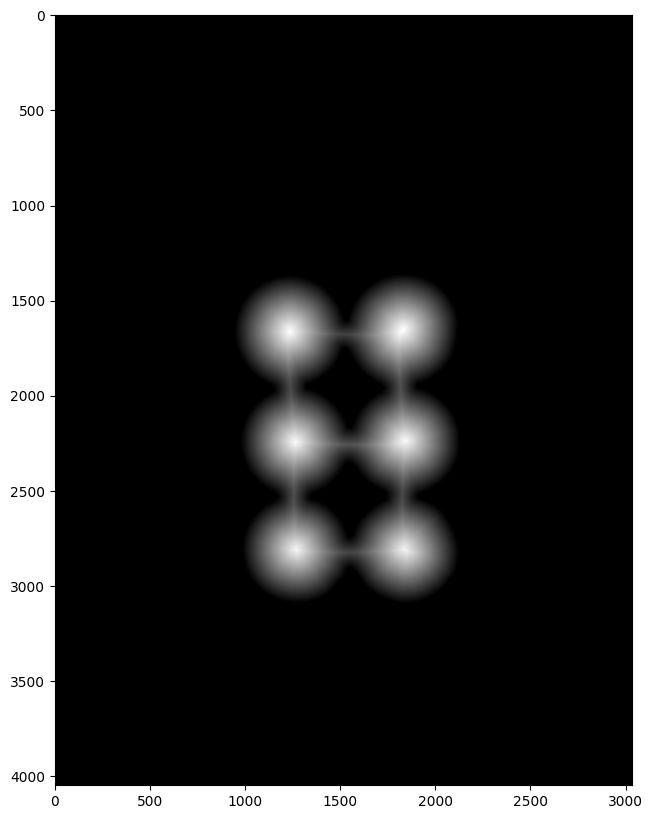

In [32]:
display(dist_transform)

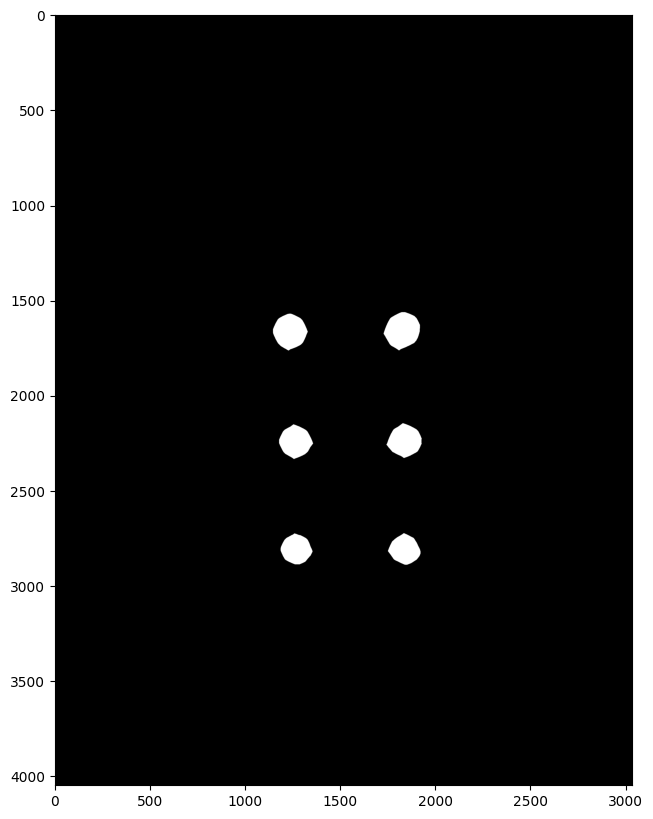

In [33]:
display(sure_foreground)

In [34]:
sure_foreground = np.uint8(sure_foreground) # sure_foreground ı 8 bitlik unsigned integer a çevirdik

unknown = cv2.subtract(sure_background,sure_foreground) # arka planı ön plandan çıkardık böylece bilinmeyen nesneleri bulduk

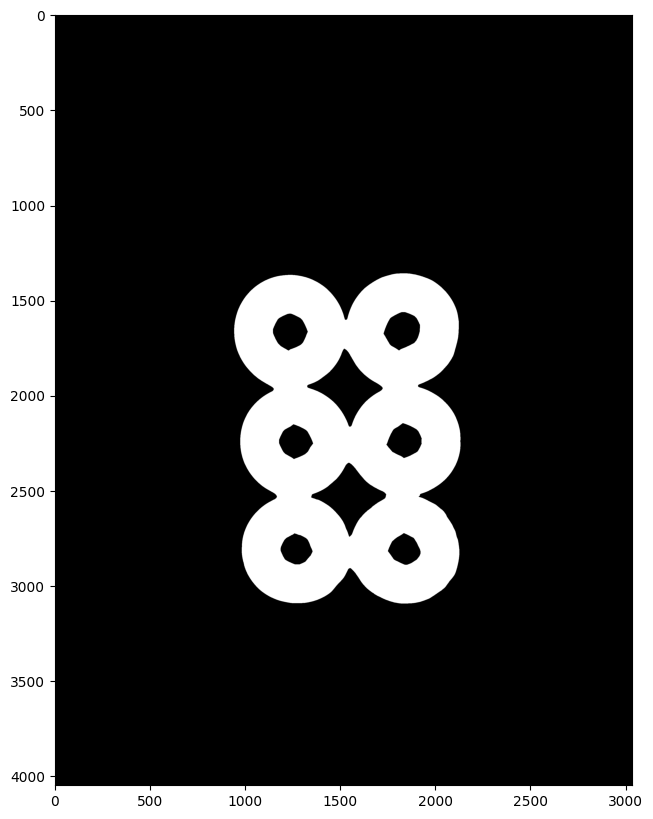

In [35]:
display(unknown)

In [36]:
ret , markers = cv2.connectedComponents(sure_foreground) # sure_foreground üzerinde bağlantı bileşenleri bulduk 

markers = markers + 1 # arka planı 1 yaptık

markers[unknown==255] = 0 # bilinmeyen nesneleri 0 yaptık

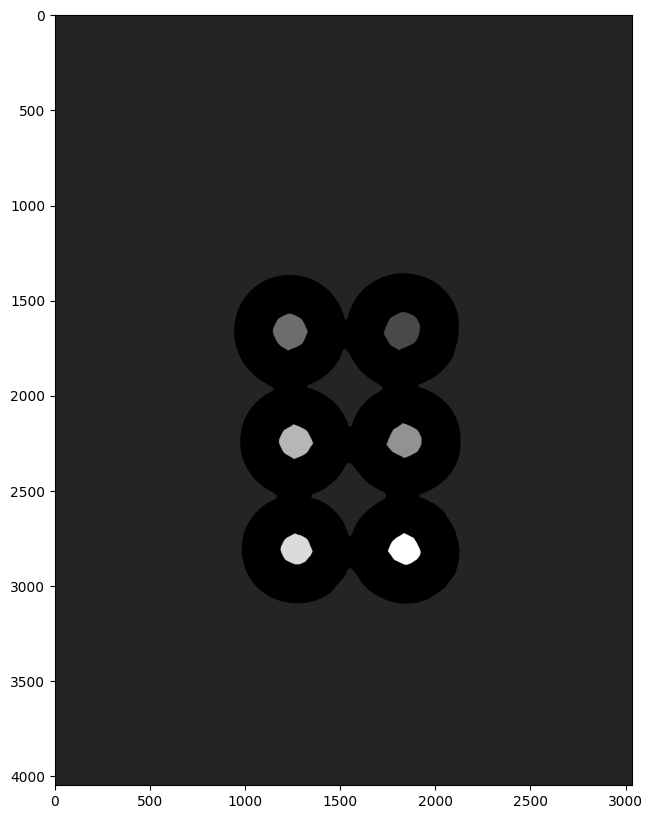

In [37]:
display(markers)    

In [38]:
markers = cv2.watershed(img,markers) # watershed işlemi yaptık bu işlem sayesinde nesneleri birbirinden ayırdık

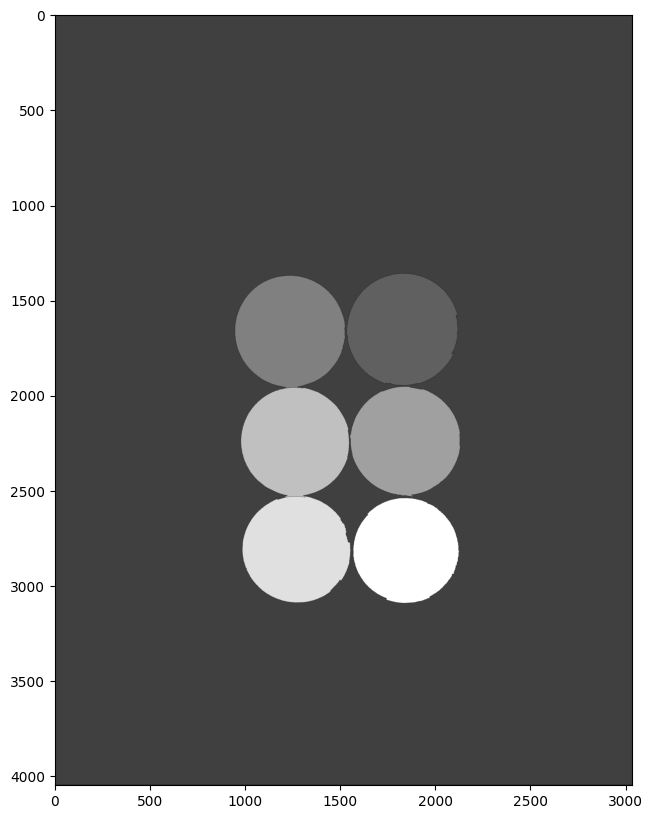

In [39]:
display(markers)

In [40]:
contours , hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)): 
    if hierarchy[0][i][3] == -1: # son kolonu kontrol ettik eğer -1 ise dış çizgiyi çizdirdik
        cv2.drawContours(img,contours,i,(255,0,0),10)


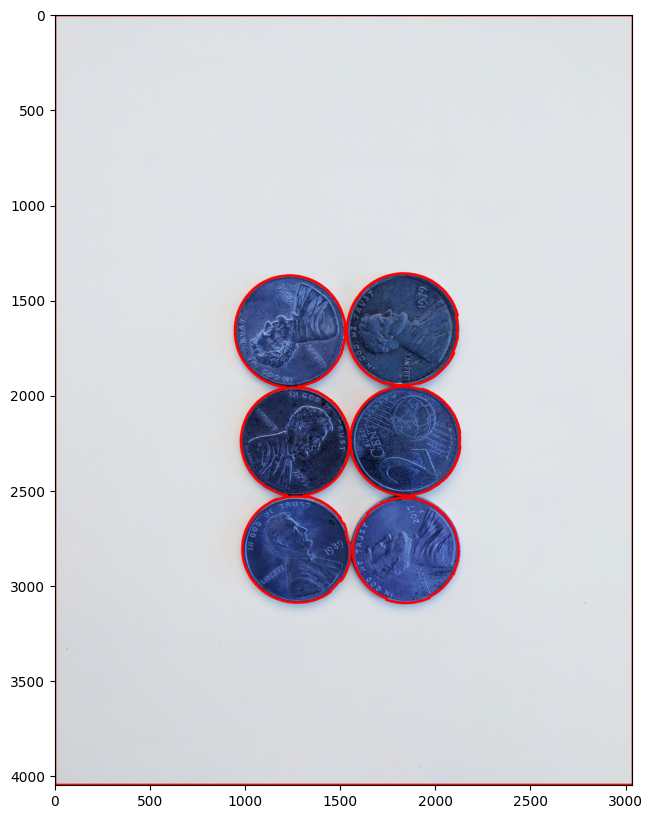

In [41]:
display(img)